In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from nltk import Tree
import os

MAX_DEPTH = 20
PROB_BRANCH = 0.25
VALUES = range(1, 10)
OPS_E = [0, 1]
OPS_T = [2, 3]
# OPS_T = [2]
NTYPES = ['e', 't']
OP_MAP = ['+', '-', '*', '/']
# OP_MAP = ['+', '-', '*']
PNESTED = 1

In [10]:
def MSU(nlst, modd=True):
    VALUES = range(1, 10)
    NUMERALS = list(map(str, VALUES)) + ['0']
    OP_MAP = ['+', '-', '*', '/']
    OPS = OP_MAP

    def m10eval(op, a0, a1):
        if op == '/':
            res = int(a0) // int(a1) if not modd else int(a0) % int(a1)
        else:
            res = eval(a0 + op + a1)
        res = res % 10
        return str(res)

    def reducible(mem, ninp):
        if len(mem) < 2:
            return False

        top, sec = mem[0], mem[1]
        if top in OPS and sec in NUMERALS:
            return True
        elif top in NUMERALS and sec[0] in NUMERALS and sec[1] in OPS:
            if sec[1] in ['+', '-'] and ninp not in ['*', '/']:
                return True
            if sec[1] in ['*', '/']:
                return True
            return False
        elif top == ')' and sec[0] == '(' and sec[1] in NUMERALS:
            return True
        elif top in NUMERALS and sec == '(' and ninp == ')':
            return True

        return False

    def reduce(mem):
        top = mem.pop(0)
        sec = mem.pop(0)

        if top in OPS and sec in NUMERALS:
            reduced = (sec, top)
        elif top in NUMERALS and sec[0] in NUMERALS and sec[1] in OPS:
            reduced = m10eval(sec[1], sec[0], top)
        elif top == ')' and sec[0] == '(' and sec[1] in NUMERALS:
            reduced = sec[1]
        elif top in NUMERALS and sec == '(':
            reduced = (sec, top)
        else:
            raise NotImplementedError

        return reduced

    stack = []
    reduce_lst = []
    msu = 0
    for t, n in enumerate(nlst):
        stack.insert(0, n)
        if len(stack) > msu:
            msu = len(stack)
        print(stack, len(stack))
        # reduce_lst.append(0)
        if t != len(nlst) - 1:
            ninp = nlst[t + 1]
        else:
            ninp = None

        r = 0
        while reducible(stack, ninp):
            stack.insert(0, reduce(stack))
            r += 1
            # reduce_lst.append(1)
        reduce_lst.append(r)

    return msu

In [11]:
expr = '8+6*3/(2-4)'
print(MSU(expr))

['8'] 1
['+', '8'] 2
['6', ('8', '+')] 2
['*', '6', ('8', '+')] 3
['3', ('6', '*'), ('8', '+')] 3
['/', '8', ('8', '+')] 3
['(', ('8', '/'), ('8', '+')] 3
['2', '(', ('8', '/'), ('8', '+')] 4
['-', '2', '(', ('8', '/'), ('8', '+')] 5
['4', ('2', '-'), '(', ('8', '/'), ('8', '+')] 5
[')', ('(', '8'), ('8', '/'), ('8', '+')] 4
5


In [2]:
def gen_expr(depth, ntype, pnested):
    
    if depth < MAX_DEPTH:
        r = random.random()
    else:
        r = 1 + 0.1
    
    if r > PROB_BRANCH:
        if ntype == 'f':
            value = random.choice(VALUES)
            return value
        elif ntype == 't':
            return gen_expr(depth + 1, 'f', pnested)
        elif ntype == 'e':
            return gen_expr(depth + 1, 't', pnested)
    else:
        if ntype == 'f':
            if pnested < PNESTED:
                e = gen_expr(depth + 2, 'e', pnested+1)
                t = [['(', e], ')']
            else:
                value = random.choice(VALUES)
                return value
        elif ntype == 't':
            op = random.choice(OPS_T)
            v1, v2 = gen_expr(depth + 2, 't', pnested), gen_expr(depth + 1, 'f', pnested)
            t = [[v1, OP_MAP[op]], v2]
        else:
            assert ntype == 'e'
            op = random.choice(OPS_E)
            v1, v2 = gen_expr(depth + 2, 'e', pnested), gen_expr(depth + 1, 't', pnested)
            t = [[v1, OP_MAP[op]], v2]
    
    return t

In [4]:
def gen_tree():
    return gen_expr(0, 'e', 0)

In [6]:
def to_nlst(t):
    return list(filter(lambda x: x not in ['[', ']', ',', '\'', ' '], str(t)))

In [10]:
es = []
for _ in range(1000):
    e = gen_tree()
    nlst = to_nlst(e)
    if len(nlst) == 1:
        continue
    try:
        msu = MSU(nlst)
        if msu <= 3:
            print(nlst, msu)
    except:
        pass

['(', '9', '+', '3', ')'] 3
['6', '+', '1'] 2
['3', '+', '(', '8', ')'] 3
['3', '/', '9', '/', '(', '8', ')'] 3
['(', '3', ')'] 2
['(', '1', '-', '4', ')', '*', '3', '/', '2'] 3
['9', '+', '5'] 2
['(', '4', ')'] 2
['7', '+', '3'] 2
['7', '/', '4', '/', '2'] 2
['(', '1', '*', '9', ')'] 3
['(', '1', '-', '1', ')', '*', '5', '/', '4'] 3
['(', '2', ')', '/', '4'] 2
['3', '+', '5'] 2
['(', '9', ')', '*', '2'] 2
['1', '*', '3'] 2
['5', '-', '6', '*', '8', '/', '1', '/', '3'] 3
['(', '8', '/', '5', '/', '4', ')'] 3
['5', '/', '1'] 2
['(', '4', ')'] 2
['6', '/', '3'] 2
['5', '*', '7', '/', '7', '*', '(', '7', ')'] 3
['(', '1', '*', '2', ')'] 3
['(', '1', ')', '/', '6'] 2
['7', '/', '8', '+', '6'] 2
['(', '8', '/', '1', ')'] 3
['(', '9', '*', '5', '/', '3', ')'] 3
['8', '/', '9', '+', '4', '*', '8', '*', '9'] 3
['(', '6', '/', '4', '*', '3', '*', '6', ')'] 3
['7', '*', '1'] 2
['(', '2', ')'] 2
['9', '-', '1', '*', '8'] 3
['2', '*', '7'] 2
['(', '1', ')'] 2
['2', '/', '8', '*', '7'] 2
['6', '+',

In [4]:
def to_value(t):
    if not isinstance(t, list):
        return t

    l = t[0]
    r = t[1]
    if l[1] in OP_MAP:
        v1, op = (to_value(l[0]), l[1])
        v2 = to_value(r)
        return eval(''.join([str(v1), op, str(v2)]))
    else:
        assert l[0] == '('
        v = to_value(l[1])
        return v

In [6]:
def to_sd(t):
    if not isinstance(t, list):
        d = []
        h = 0
    else:
        l, r = t
        d_l, h_l = to_sd(l)
        d_r, h_r = to_sd(r)
        h = max(h_l, h_r) + 1
        d = d_l + [h] + d_r

    return d, h

In [35]:
def to_value_sd(sd_lst, node_lst):
    if len(sd_lst) == 0:
        node = node_lst[0]
        v = node
    else:
        i = np.argmax(sd_lst)
        child_l, v_l = to_value_sd(sd_lst[:i], node_lst[:i+1])
        child_r, v_r = to_value_sd(sd_lst[i+1:], node_lst[i+1:])
        node = [child_l, child_r]
        if isinstance(v_l, list) and not isinstance(v_r, list):
            if v_l[1] in OP_MAP:
                v1, op = v_l[0], v_l[1]
                v2 = v_r
                v = str(eval(''.join([v1, op, v2])))
            else:
                assert v_l[0] == '(', str(v_l)
                v = str(v_l[1])
        else:
            assert not isinstance(v_l, list) and not isinstance(v_r, list)
            v = [v_l, v_r]

    return node, v

In [8]:
def ave_len(es):
    lens = []
    for e in es:
        lens.append(e[0].split())
    return np.average(lens), np.var(lens)

In [9]:
def plot_sd(t):
    sd_lst, _ = to_sd(t)
    nlst = to_nlst(t)
    fig, ax = plt.subplots()
    fig.dpi = 200
    plt.bar(np.arange(len(sd_lst)), sd_lst)
    plt.xticks(np.arange(len(nlst))-0.5, nlst)
    plt.grid(axis='y', linestyle='--')

In [10]:
def combine(a0, a1):
    def unfinised(n):
        return isinstance(n, list) or isinstance(n, tuple)
    
    def eval_mod(op, a0, a1):
        if op == '/':
            return int(a0) % int(a1)
        else:
            return eval(''.join([str(a0), op, str(a1)])) % 10
    
    if unfinised(a0):
        if a1 == ')':
            lp, num = a0
            assert lp == '('
            return num
        else:
            num, op = a0
            return eval_mod(op, num, a1)
#             try:
#                 return eval(''.join([str(num),op,str(a1)]))
#             except:
#                 return -1
    else:
        return (a0, a1)      

In [11]:
# simplified
def shift_reduce(nlst, sdlst):
    N = 0
    max_nmem = 0
    mem = []
    mem.append((nlst[0],  sdlst[0]))

    for n, sd in zip(nlst[1:], sdlst[1:]+[10000]):
        while sd > mem[-1][1]:
            a0, sd0 = mem.pop()
            n = combine(a0, n)
            if len(mem) == 0:
                break
        mem.append((n, sd))
        if len(mem) > max_nmem:
            max_nmem = len(mem)
                
    assert len(mem) == 1
    return mem[0][0], max_nmem

In [23]:
seq = '8 + 9 * 3 + 8 / ( 9 ) * 2 / ( 6 - 2 * 6 - 6 )'.split()
ds = '1 3 1 2 4 9 1 3 1 2 4 5 6 8 6 1 3 1 2 4 5 7'.split()
shift_reduce(seq, list(map(int, ds)))

(1, 5)

In [13]:
def remove_brackets(expr):
    return ''.join(list(filter(lambda x: x not in ['(',')'], expr)))

In [14]:
def ed(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]

print(ed("Helloworld", "HalloWorld"))

2


In [15]:
def expected_ed(samples, nsampling=1000):
    res = []
    lens = []
    for _ in range(nsampling):
        e1 = random.choice(samples)
        e2 = random.choice(samples)
        edis = ed(e1[1].split(), e2[1].split())
        res.append(edis)
        l1 = len(e1[1].split())
        l2 = len(e2[1].split())
        l_mean = np.mean([l1, l2])
        lens.append(l_mean)
        
    return np.mean(res)/np.mean(lens)

In [16]:
def draw(x, y):
    plt.plot(x, y, 'ro-', label='ed/len')
    plt.legend()
    plt.grid()
    plt.grid(color='b' , linewidth=0.1 ,linestyle='--')

In [37]:
gen_tree()

[[[['(', [[8, '*'], 6]], ')'], '/'], 9]

In [38]:
[[[['(', [[8, '*'], 6]], ')'], '/'], 9]

[[[['(', [[8, '*'], 6]], ')'], '/'], 9]

In [39]:
etree = [[8,'+'],[[[[6, '*'], 3], '/'], [['(', [[2,  '-'], 4]],')']]]
sd_lst = to_sd(etree)[0]

In [40]:
to_nlst(etree)

['8', '+', '6', '*', '3', '/', '(', '2', '-', '4', ')']

In [41]:
to_sd(etree)[0]

[1, 6, 1, 2, 3, 5, 3, 1, 2, 4]

In [42]:
to_value_sd(sd_lst, to_nlst(etree))

([['8', '+'], [[[['6', '*'], '3'], '/'], [['(', [['2', '-'], '4']], ')']]],
 '-1.0')

In [43]:
shift_reduce(to_nlst(etree), to_sd(etree)[0])

(8, 4)

# gen

In [141]:
from collections import defaultdict

In [142]:
MAX_DEPTH = 30
PROB_BRANCH = 0.4
NSAMPLES = 300000
# NSAMPLES = 150000
prob_h = (1/np.array(range(2, MAX_DEPTH+1)) )**(1.5)
prob_h = prob_h / prob_h.sum()
nsamples_bound = {h:int(prob_h[h-2]*NSAMPLES) for h in range(2, MAX_DEPTH+1)}
nsamples = defaultdict(int)
PNESTED = 1

In [143]:
examples = []
printed = {h:False for h in range(2, MAX_DEPTH+1)}
i = 0
while True:
    finished = True
    for h in range(2, MAX_DEPTH+1):
        if nsamples[h] < nsamples_bound[h]:
            finished = False
    if finished:
        break
    
    t = gen_tree()
    if t in VALUES:
        continue
    nodes = to_nlst(t)
    nodes = ' '.join(nodes)
    sd_lst, h = to_sd(t)
    if h > MAX_DEPTH:
        continue
    if nsamples[h] >= nsamples_bound[h]:
        if not printed[h]:
            print('finished:', h)
            printed[h] = True
        continue
    else:
        nsamples[h] += 1
    
    sd_lst = ' '.join([str(sd) for sd in sd_lst])
    examples.append((nodes, sd_lst, str(h)))
    i += 1

    if i >= NSAMPLES:
        break
print('Done')

finished: 10
finished: 12
finished: 11
finished: 8
finished: 13
finished: 14
finished: 9
finished: 6
finished: 15
finished: 16
finished: 7
finished: 17
finished: 4
finished: 18
finished: 19
finished: 20
finished: 5
finished: 21
finished: 2
finished: 22
finished: 23
finished: 24
finished: 25
finished: 3
finished: 26
finished: 29
finished: 27
finished: 28
Done


In [144]:
examples[0]

('( 4 * 2 - 1 - 3 * 1 ) - 2 * 8 / 9', '7 1 2 3 4 5 6 1 2 8 9 10 1 2 3 4', '10')

In [145]:
es = []
es_eval = []
hs = []
mmc_lst = []
for e in examples:
    expr, ds, h = e
    expr = expr.split()
    ds = list(map(int, ds.split()))
    try:
        val, mmc = shift_reduce(expr, ds)
        if mmc > 2:
            hs.append(int(h))
            es.append(e)
            es_eval.append((e[0], e[1], e[2], str(val)))
            mmc_lst.append(mmc)
    except:
        pass

(array([  881., 13095.,  3958., 10634.,  4946.,  7974.,  4760.,  6012.,
         4227.,  4751.,  3628.,  3784.,  3111.,  3115.,  2683.,  2619.,
         2297.,  2238.,  2025.,  1932.,  1740.,  1673.,  1554.,  1469.,
         1375.,  2552.]),
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 26 Patch objects>)

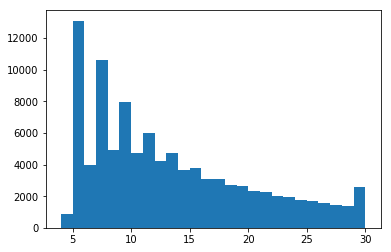

In [146]:
plt.hist(hs, bins=np.arange(min(hs), max(hs)+1))

In [147]:
examples_h = {}
for line in es:
    expr, ds, h = line
    h = int(h)
    if h not in examples_h:
        examples_h[h] = []
    examples_h[h].append((expr, ds))

In [148]:
hs = []
expected_eds = []
for h in sorted(examples_h.keys()):
    hs.append(h)
    expected_eds.append(expected_ed(examples_h[h]))

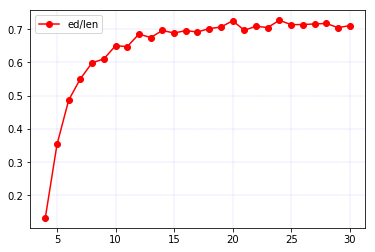

In [149]:
draw(hs, expected_eds)

In [150]:
len(es)

99033

In [151]:
min(mmc_lst)

3

In [152]:
max(mmc_lst)

5

(array([    0., 53940., 34098., 10995.]),
 array([2, 3, 4, 5, 6]),
 <a list of 4 Patch objects>)

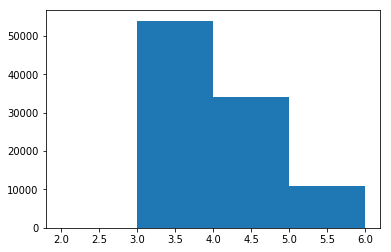

In [153]:
plt.hist(mmc_lst, bins=np.arange(2, 6+1))

In [154]:
len(es_eval)

99033

In [156]:
es_eval[0]

('( 4 * 2 - 1 - 3 * 1 ) - 2 * 8 / 9',
 '7 1 2 3 4 5 6 1 2 8 9 10 1 2 3 4',
 '10',
 '8')

# save

In [157]:
suffix = 'pa1.mmc3.txt'

In [158]:
random.shuffle(es_eval)
ntrain = int(0.8 * len(es_eval))
nvalid = int(0.1 * len(es_eval))
ntest = int(0.1 * len(es_eval))
train = es_eval[:ntrain]
valid = es_eval[ntrain: ntrain+nvalid]
test = es_eval[ntrain+nvalid:]

In [159]:
for dataset, dataset_type in zip([train, valid, test], ['train', 'valid', 'test']):
    fname = '%s.%s' % (dataset_type, suffix)
    with open(fname, 'w') as f:
        for line in dataset:
            f.write('\t'.join(line[:3]))
            f.write('\n')

In [160]:
train[0]

('8 / 6 + 1 / ( 3 * 9 * 7 - 4 * 9 )',
 '1 2 3 10 1 9 7 1 2 3 4 5 6 1 2 8',
 '10',
 '3')

In [161]:
os.path.dirname(os.getcwd())

'/Users/marc/Documents/research/mann_eval/data'

In [162]:
for dataset, dataset_type in zip([train, valid, test], ['train', 'valid', 'test']):
    fname = '%s.%s' % (dataset_type, suffix)
    data_dir = os.path.dirname(os.getcwd())
    feval_dir = os.path.join(data_dir, 'feval')
    fname = os.path.join(feval_dir, fname)
    with open(fname, 'w') as f:
        for line in dataset:
            f.write('\t'.join(line))
            f.write('\n')